Importing dependencies

In [1]:
import tradingeconomics as te
import numpy as np
import matplotlib.pyplot as plt
from time import sleep

API login

In [2]:
te.login('jupyter:jupyter') # Signup for a free API key at https://developer.tradingeconomics.com/

'You are logged in as a jupyter:jupyter'

Importing data

In [3]:
category_symbols = ['GCT1503', 'GCT1502', 'GCT1501']
geos = sorted(['AR', 'LA', 'MS', 'NC', 'TN'])
categories = ['Advanced Degree', "Bachelor's Degree", 'High School']
states = []
values = []

for base_symbol in category_symbols:
    category_values = []
    for geo in geos:
        sleep(0.3)
        symbol = base_symbol + geo
        data = te.getFedRSnaps(symbol = symbol)[0]
        state = data['Country']
        value = data['Last']

        category_values.append(value)

        if state not in states:
            states.append(state)
    values.append(category_values)

Plotting

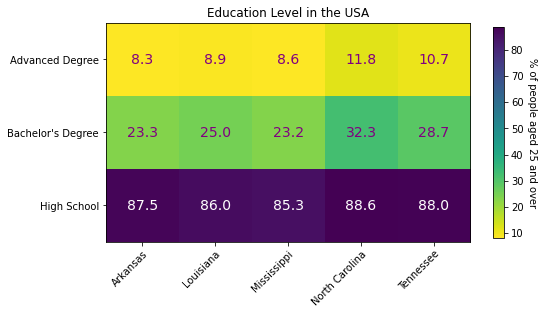

In [4]:
fig, ax = plt.subplots(figsize = (8,8))
im = ax.imshow(values, cmap = 'viridis_r') # The default color is 'viridis', but we use '_r' to turn it upside down

# Create colorbar at the right side
cbar = ax.figure.colorbar(im, ax=ax, shrink=0.38)
cbar.ax.set_ylabel('% of people aged 25 and over', rotation=-90, va="bottom")

# We want to show all ticks for each state/category...
ax.set_xticks(np.arange(len(states)))
ax.set_yticks(np.arange(len(categories)))

# ... and label them with the respective list entries
ax.set_xticklabels(states)
ax.set_yticklabels(categories)

# Rotate the tick labels and set their alignment.
plt.setp(
    ax.get_xticklabels(),
    rotation=45,
    ha='right',
    rotation_mode='anchor'
)
    
# Loop over data dimensions and create text annotations.
for y in range(len(categories)):
    for x in range(len(states)):
        # 
        color = 'purple' if values[y][x] < 40 else 'white' 
        text = ax.text(
            x,
            y,
            values[y][x],
            ha='center',
            va='center',
            color=color,
            fontsize=14
        )

ax.set_title('Education Level in the USA')
fig.tight_layout()
plt.show()